In [2]:
#파일 업로드

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving S.csv to S.csv
User uploaded file "S.csv" with length 16298 bytes


In [0]:
# 각종 라이브러리 넣어주기

import pandas as pd # 판다스
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# FROM keras.callbavcks import TensorBoard, ModelCheckPoint

import datetime

#Load Dataset

In [26]:
data = pd.read_csv('S.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-07,6.21,6.34,6.17,6.32,6.32,8823600
1,2019-01-08,6.35,6.36,6.22,6.29,6.29,6943400
2,2019-01-09,6.28,6.32,6.19,6.26,6.26,9698900
3,2019-01-10,6.23,6.39,6.21,6.28,6.28,12027000
4,2019-01-11,6.24,6.39,6.22,6.37,6.37,13963300


In [0]:
#Compute Mid Price


In [0]:
high_prices = data['High'].values
low_prices = data['Low'].values

mid_prices = (high_prices +low_prices) / 2

In [0]:
seq_len = 50
sequence_length = seq_len + 1

result = []

for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index : index + sequence_length])

In [31]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((180, 50, 1), (20, 50, 1))

In [37]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


## Training



In [39]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 180 samples, validate on 20 samples
Epoch 1/20





180/180 [==============================] - 3s 16ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 2/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 3/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 9.4396e-04
Epoch 4/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 4.9114e-04
Epoch 5/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 5.1934e-04
Epoch 6/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 4.7752e-04
Epoch 7/20
180/180 [==============================] - 1s 8ms/step - loss: 0.0018 - val_loss: 5.7083e-04
Epoch 8/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 9/20
180/180 [============

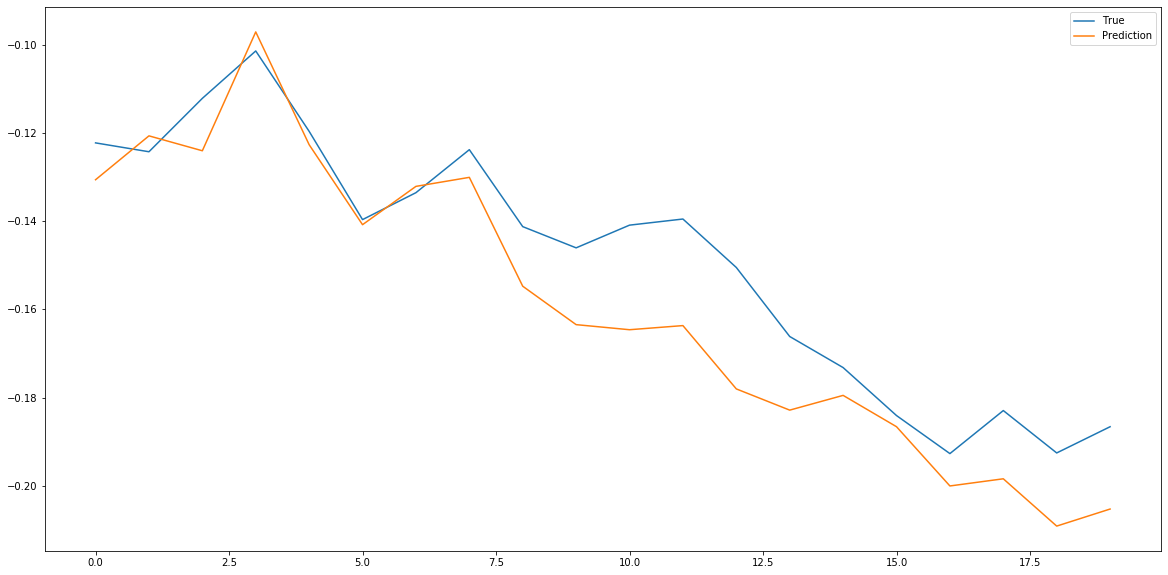

In [42]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()